# Objective of the Case: 
Simple Problem- Predict the price of Flights. Study the different variables, analyze the case, use alogorithms to predict the price of flight ticket as accurately as possible.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import os
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
%matplotlib inline

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected =True)
cf.go_offline()

In [2]:
#Upload the dataset

In [3]:
dataset = pd.read_excel("Data_Train.xlsx")

In [4]:
pd.set_option("display.max_columns",1000)

In [5]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
dataset.shape

(10683, 11)

In [7]:
# There are 11 columns and 10k Plus data points

# Pre-Processing

In [8]:
#Identify the Null Features and Percentage of Values Missing

In [9]:
Null_Values = [feature for feature in dataset.columns if dataset[feature].isnull().sum() >=1]
for feature in Null_Values:
    print(feature ,np.round(dataset[feature].isnull().mean(),4), "% Missing Values")

Route 0.0001 % Missing Values
Total_Stops 0.0001 % Missing Values


In [10]:
# dataset.isnull().sum().sum()

In [11]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
# Imputation of Null Values

In [13]:
dataset["Total_Stops"] =dataset["Total_Stops"].fillna(0)

# As should be the case with Ailine based case there are lot of Date and Time based features whic require specific treatment.

In [14]:
dataset["Date_of_Journey_year"]=pd.to_datetime(dataset["Date_of_Journey"], format = "%d/%m/%Y").dt.year

In [15]:
dataset["Date_of_Journey_month"] = pd.to_datetime(dataset["Date_of_Journey"],format = "%d/%m/%Y").dt.month

In [16]:
dataset["Date_of_Journey_day"] = pd.to_datetime(dataset["Date_of_Journey"],format = "%d/%m/%Y").dt.day

In [17]:
dataset["Date_of_Journey_day"].value_counts()

9     1406
6     1288
27    1130
21    1111
1     1075
24    1052
15     984
12     957
3      848
18     832
Name: Date_of_Journey_day, dtype: int64

In [18]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,3,1


In [19]:
# As we have segregated year, month and date will drop Date Variable

In [20]:
dataset = dataset.drop(["Date_of_Journey"],axis =1)

In [21]:
dataset.drop(["Additional_Info"],axis =1,inplace = True)

In [22]:
dataset["Departure_Hour"] = pd.to_datetime(dataset["Dep_Time"]).dt.hour

In [23]:
dataset["Departure_Hour"].value_counts()

9     916
7     867
8     697
17    695
6     687
20    651
5     629
11    580
19    567
10    536
14    523
21    492
16    472
18    444
13    417
22    387
15    319
2     194
12    178
4     170
23    161
0      40
1      37
3      24
Name: Departure_Hour, dtype: int64

In [24]:
# Maximu travel is at Morning 9 A.M, followed by 7 A.M, A.M and so on, indicating maximum travel is happening at morning hours

In [25]:
dataset["Departure_Min"] = pd.to_datetime(dataset["Dep_Time"]).dt.minute

In [26]:
dataset["Departure_Min"].value_counts()

0     2062
30    1215
55    1058
10     890
45     876
5      773
15     692
25     691
20     666
35     665
50     591
40     504
Name: Departure_Min, dtype: int64

In [27]:
# We will drop Departure Time Column as we have departure time and minutes column

In [28]:
dataset.drop(["Dep_Time"],axis =1,inplace = True)

In [29]:
dataset["Arrival_Date"] = pd.to_datetime(dataset["Arrival_Time"]).dt.date

In [30]:
dataset["Arrival_Month"] = pd.to_datetime(dataset["Arrival_Time"]).dt.month

In [31]:
dataset["Arrival_Hour"] = pd.to_datetime(dataset["Arrival_Time"]).dt.hour

In [32]:
dataset["Arrival_minute"] = pd.to_datetime(dataset["Arrival_Time"]).dt.minute

In [33]:
dataset.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day,Departure_Hour,Departure_Min,Arrival_Date,Arrival_Month,Arrival_Hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,3897,2019,3,24,22,20,2023-03-22,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,7662,2019,5,1,5,50,2023-05-04,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,13882,2019,6,9,9,25,2023-06-10,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,6218,2019,5,12,18,5,2023-05-04,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,13302,2019,3,1,16,50,2023-05-04,5,21,35


In [34]:
dataset.drop(["Arrival_Date","Arrival_Month","Arrival_Time"],axis =1,inplace = True)

In [35]:
duration = list(dataset["Duration"])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + " 0m"
        else:
            duration[i] = "0h " + duration[i]

In [36]:
duration_hour = []
duration_min = []

for i in range(len(duration)):
    duration_hour.append(int(duration[i].split()[0][0]))
    duration_min.append(int(duration[i].split("m")[0].split()[-1]))
    

In [37]:
dataset["Duration_Hour"] = duration_hour
dataset["Duration_Min"] = duration_min

In [38]:
dataset.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_minute,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,2019,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882,2019,6,9,9,25,4,25,1,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,2019,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302,2019,3,1,16,50,21,35,4,45


In [39]:
dataset["Total_Stops"] = dataset["Total_Stops"].replace({"non-stop":0, "1 stop":1, "2 stops": 2, "3 stops":3, "4 stops":4})

In [40]:
dataset["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10683, dtype: object

In [41]:
# Since we have destination and Source we will drop Route Column

In [42]:
dataset.drop(["Route"], axis =1,inplace = True)

In [43]:
dataset.drop(["Duration"], axis =1,inplace = True)

In [44]:
dataset.drop(["Date_of_Journey_year"], axis =1,inplace = True)

In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Airline                10683 non-null  object
 1   Source                 10683 non-null  object
 2   Destination            10683 non-null  object
 3   Total_Stops            10683 non-null  int64 
 4   Price                  10683 non-null  int64 
 5   Date_of_Journey_month  10683 non-null  int64 
 6   Date_of_Journey_day    10683 non-null  int64 
 7   Departure_Hour         10683 non-null  int64 
 8   Departure_Min          10683 non-null  int64 
 9   Arrival_Hour           10683 non-null  int64 
 10  Arrival_minute         10683 non-null  int64 
 11  Duration_Hour          10683 non-null  int64 
 12  Duration_Min           10683 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


# EDA

In [46]:
dataset.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Date_of_Journey_month', 'Date_of_Journey_day', 'Departure_Hour',
       'Departure_Min', 'Arrival_Hour', 'Arrival_minute', 'Duration_Hour',
       'Duration_Min'],
      dtype='object')

In [47]:
# Outliers

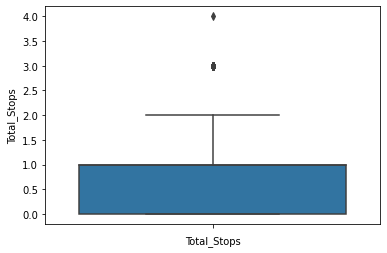

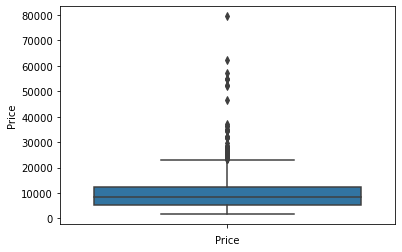

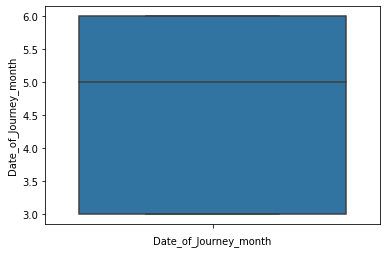

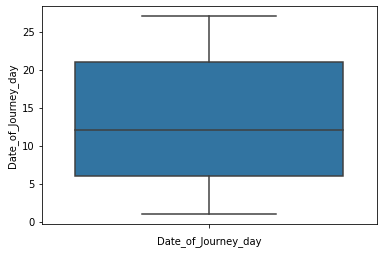

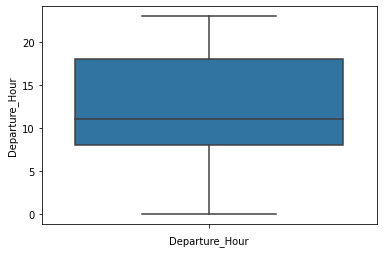

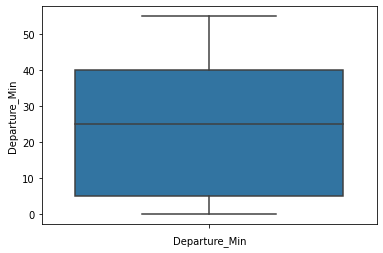

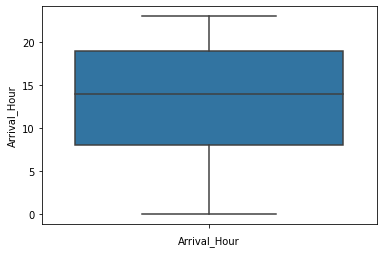

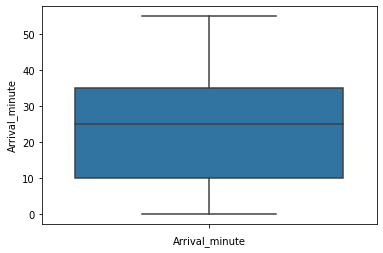

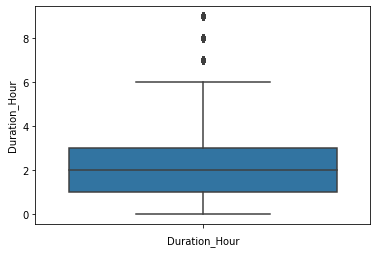

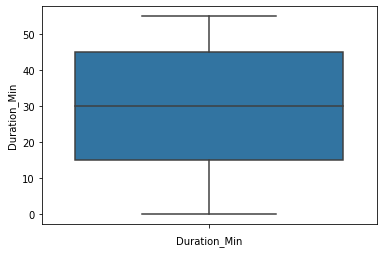

In [48]:

for feature in dataset:
    if dataset[feature].dtype != "O":
        sns.boxplot(y = dataset[feature], data = dataset)
        plt.xlabel(feature)
        plt.show()

In [49]:
# Looking for the distribution pattern of price

<AxesSubplot:xlabel='Price', ylabel='Density'>

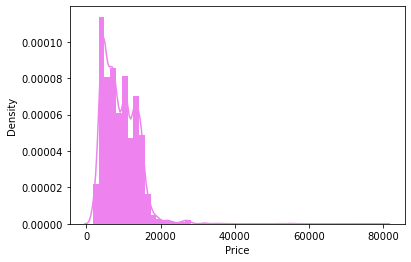

In [50]:
sns.distplot(dataset["Price"], bins =50, hist_kws = {"alpha":1}, color = "violet")

<AxesSubplot:xlabel='Price', ylabel='Count'>

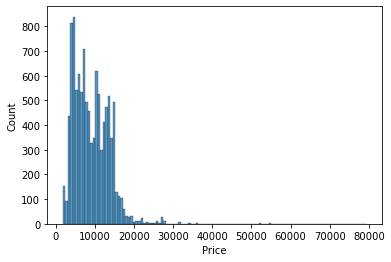

In [51]:
sns.histplot(dataset["Price"])

In [52]:
# Check for Distribution of All Contnuous Variables

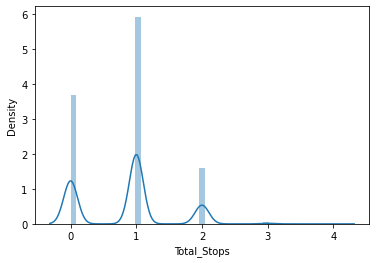

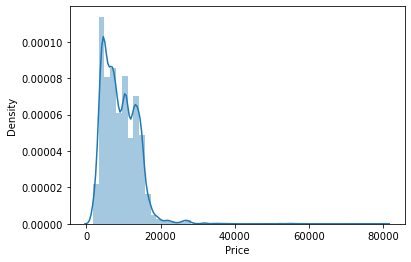

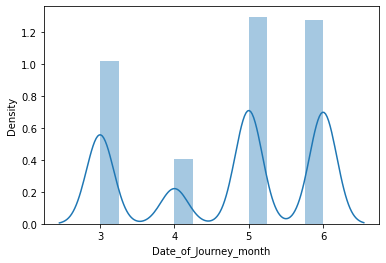

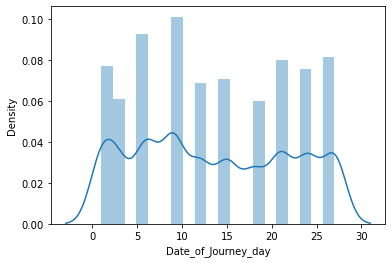

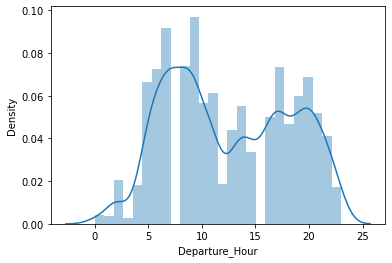

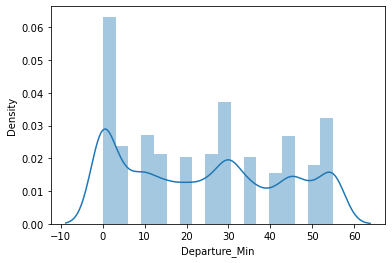

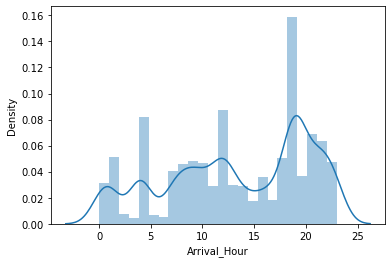

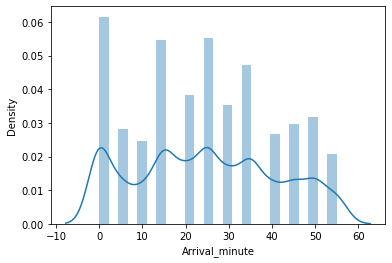

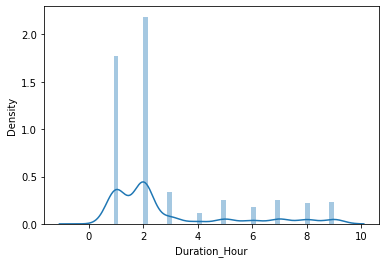

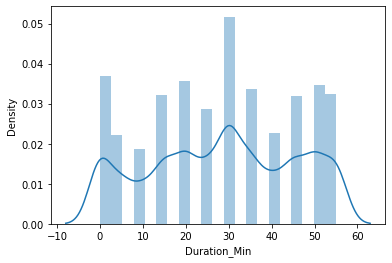

In [53]:
for feature in dataset:
    if dataset[feature].dtype != "O":
        sns.distplot(x = dataset[feature])
        plt.xlabel(feature)
        plt.show()

In [54]:
# Behaviour of other variables with respect to price

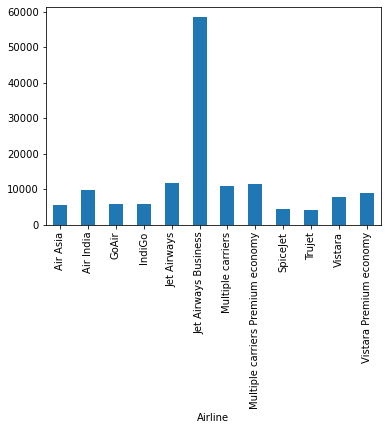

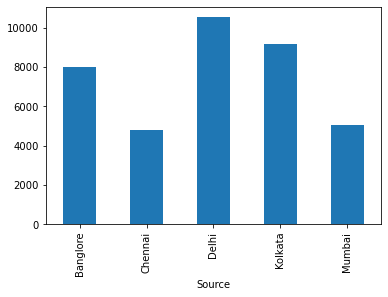

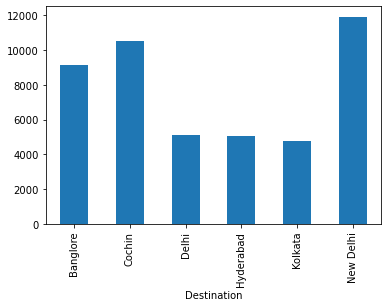

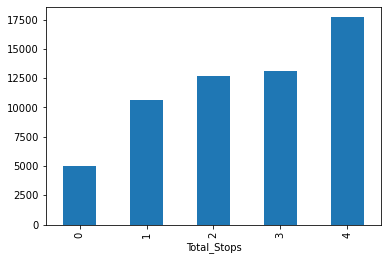

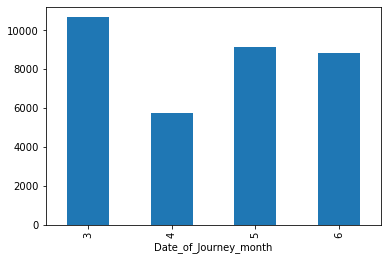

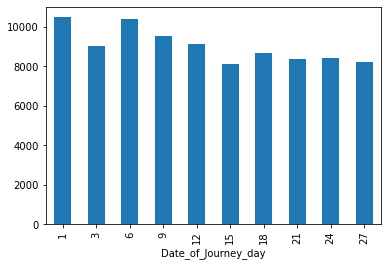

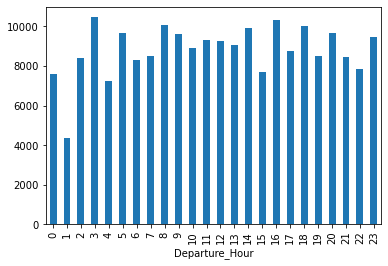

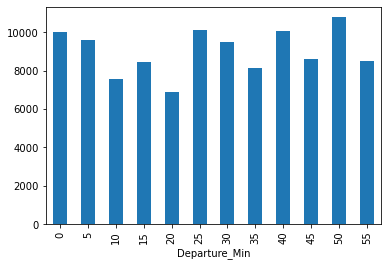

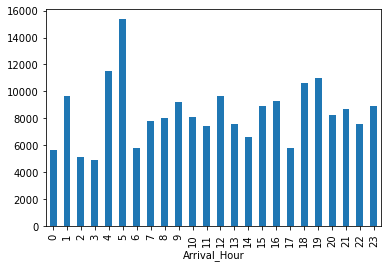

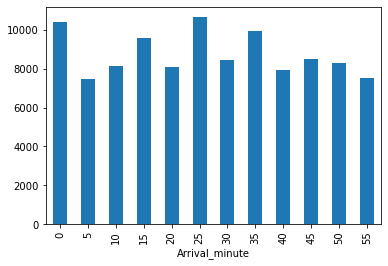

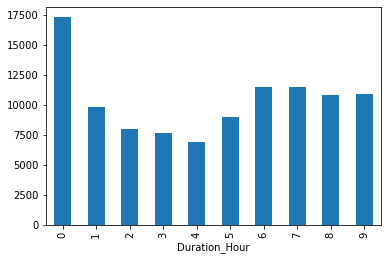

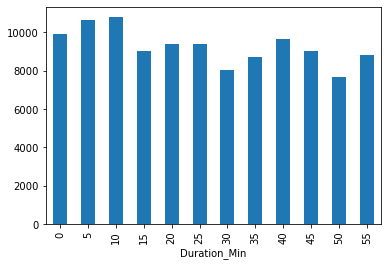

In [55]:
for feature in dataset:
    if feature != "Price":
        dataset.groupby(feature)["Price"].mean().plot(kind = "bar")
        plt.show()

In [56]:
dataset.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Date_of_Journey_month', 'Date_of_Journey_day', 'Departure_Hour',
       'Departure_Min', 'Arrival_Hour', 'Arrival_minute', 'Duration_Hour',
       'Duration_Min'],
      dtype='object')

<Figure size 2160x2160 with 0 Axes>

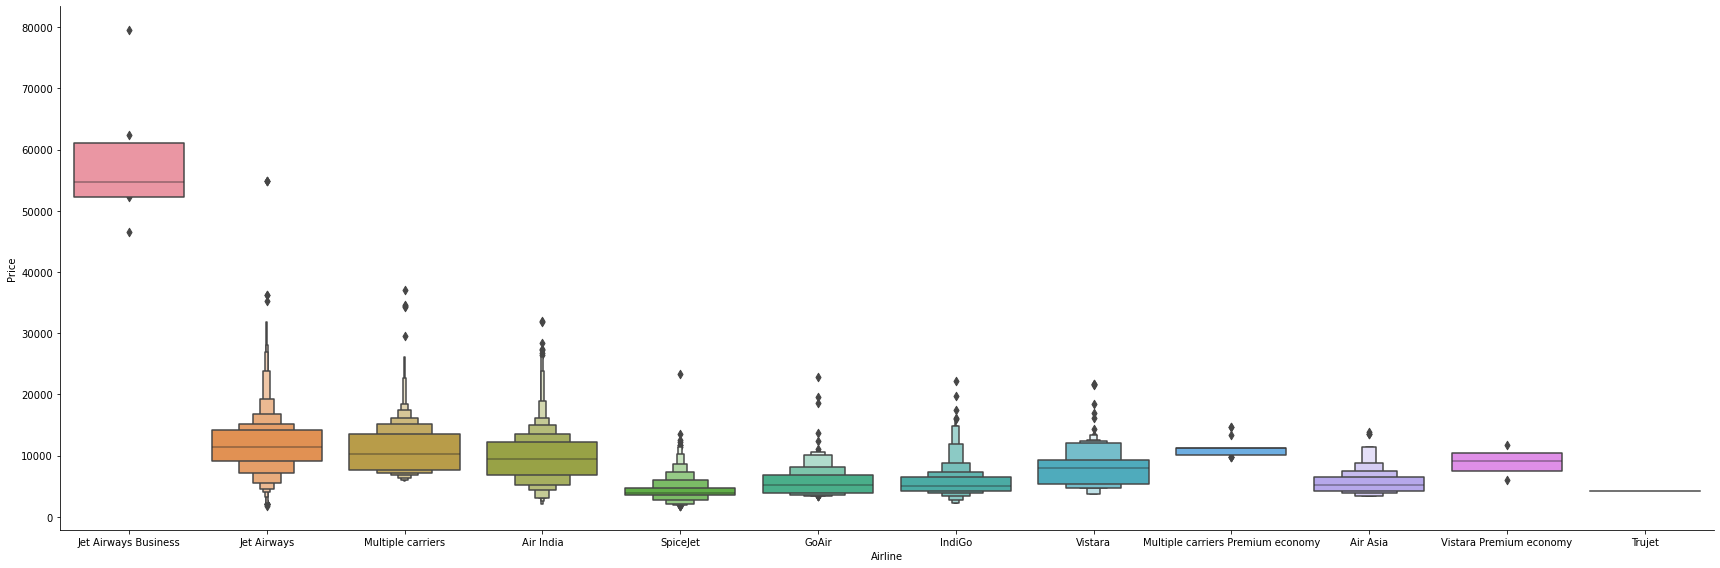

In [57]:
plt.figure(figsize = (30,30))
sns.catplot(x = "Airline", y = "Price", data = dataset.sort_values("Price",ascending = False), height = 8, aspect = 3, kind = 'boxen')

<Figure size 1440x2880 with 0 Axes>

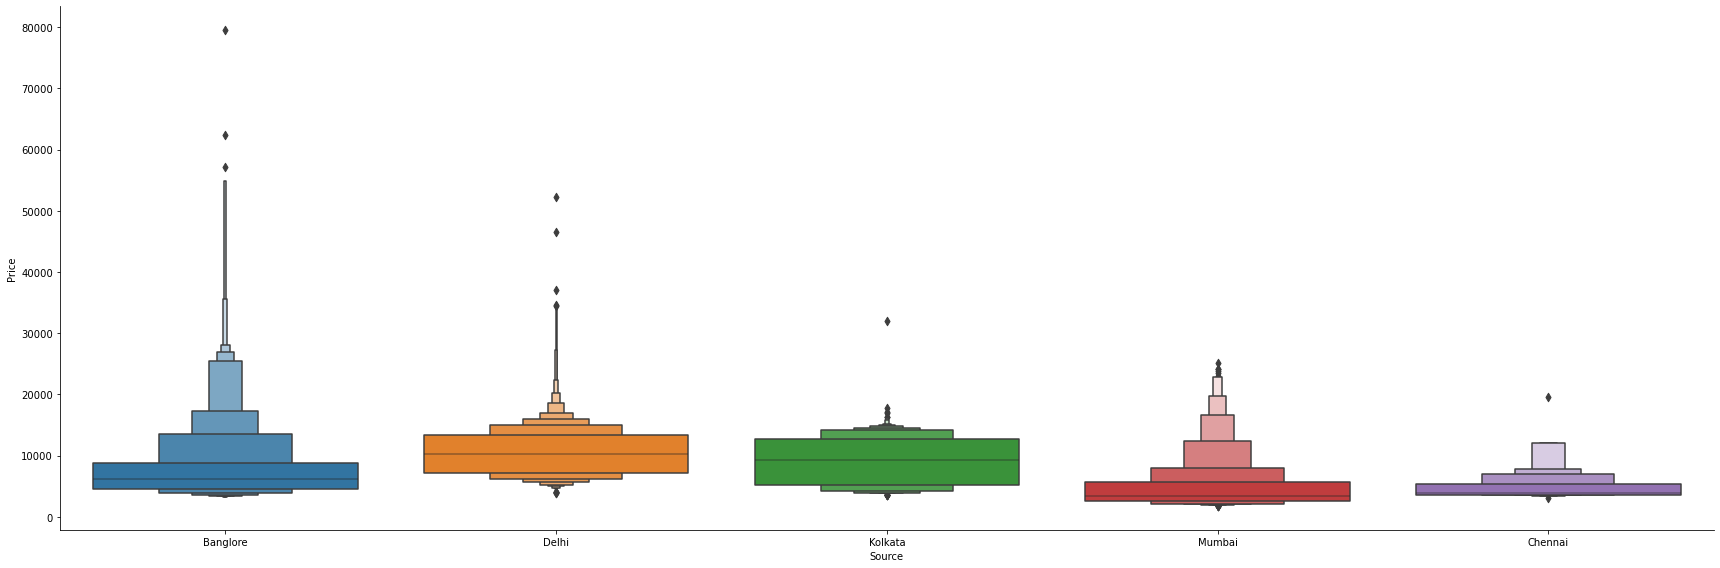

In [58]:
plt.figure(figsize = (20,40))
sns.catplot( data = dataset.sort_values("Price",ascending = False),x = "Source", y = "Price", height =8,aspect =3, kind ="boxen")

In [59]:
#Median price of flights orginating is higher in Delhi but bengaluru has more spread

In [60]:
dataset.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Date_of_Journey_month', 'Date_of_Journey_day', 'Departure_Hour',
       'Departure_Min', 'Arrival_Hour', 'Arrival_minute', 'Duration_Hour',
       'Duration_Min'],
      dtype='object')

In [61]:
dataset.head()

,Airline,Source,Destination,Total_Stops,Price,Date_of_Journey_month,Date_of_Journey_day,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_minute,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,1,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45


# One Hot Encoding
As Airline, Source and Destination are Nominal Variables we will perform one hot encoding

In [62]:
dataset = pd.get_dummies(dataset,columns = ["Airline","Source","Destination"],drop_first=True)

In [63]:
#Check whether all variables are encoded and are in numerical form before training for model
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10683 non-null  int64
 1   Price                                      10683 non-null  int64
 2   Date_of_Journey_month                      10683 non-null  int64
 3   Date_of_Journey_day                        10683 non-null  int64
 4   Departure_Hour                             10683 non-null  int64
 5   Departure_Min                              10683 non-null  int64
 6   Arrival_Hour                               10683 non-null  int64
 7   Arrival_minute                             10683 non-null  int64
 8   Duration_Hour                              10683 non-null  int64
 9   Duration_Min                               10683 non-null  int64
 10  Airline_Air India                          106

In [64]:
#Correlation with Numerical Variable

In [65]:
dataset.corr()["Price"].sort_values(ascending = False)

Price                                        1.000000
Total_Stops                                  0.603891
Airline_Jet Airways                          0.416135
Destination_Cochin                           0.270619
Source_Delhi                                 0.270619
Airline_Jet Airways Business                 0.253302
Destination_New Delhi                        0.189785
Airline_Multiple carriers                    0.139803
Duration_Hour                                0.128241
Airline_Air India                            0.050346
Arrival_Hour                                 0.024264
Airline_Multiple carriers Premium economy    0.017651
Source_Kolkata                               0.009377
Departure_Hour                               0.006819
Airline_Vistara Premium economy             -0.000453
Airline_Trujet                              -0.010380
Departure_Min                               -0.024492
Airline_Vistara                             -0.060646
Arrival_minute              

<AxesSubplot:>

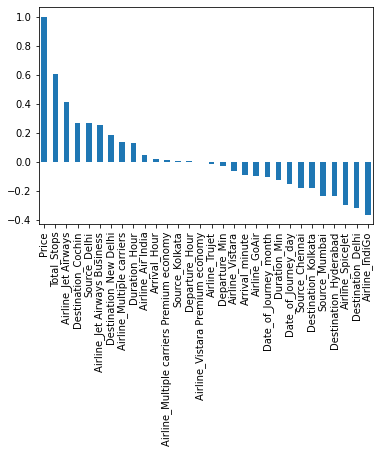

In [66]:
dataset.corr()["Price"].sort_values(ascending = False).plot(kind = "bar")

In [67]:
#hHeatmap to see the extent of correlation

<AxesSubplot:>

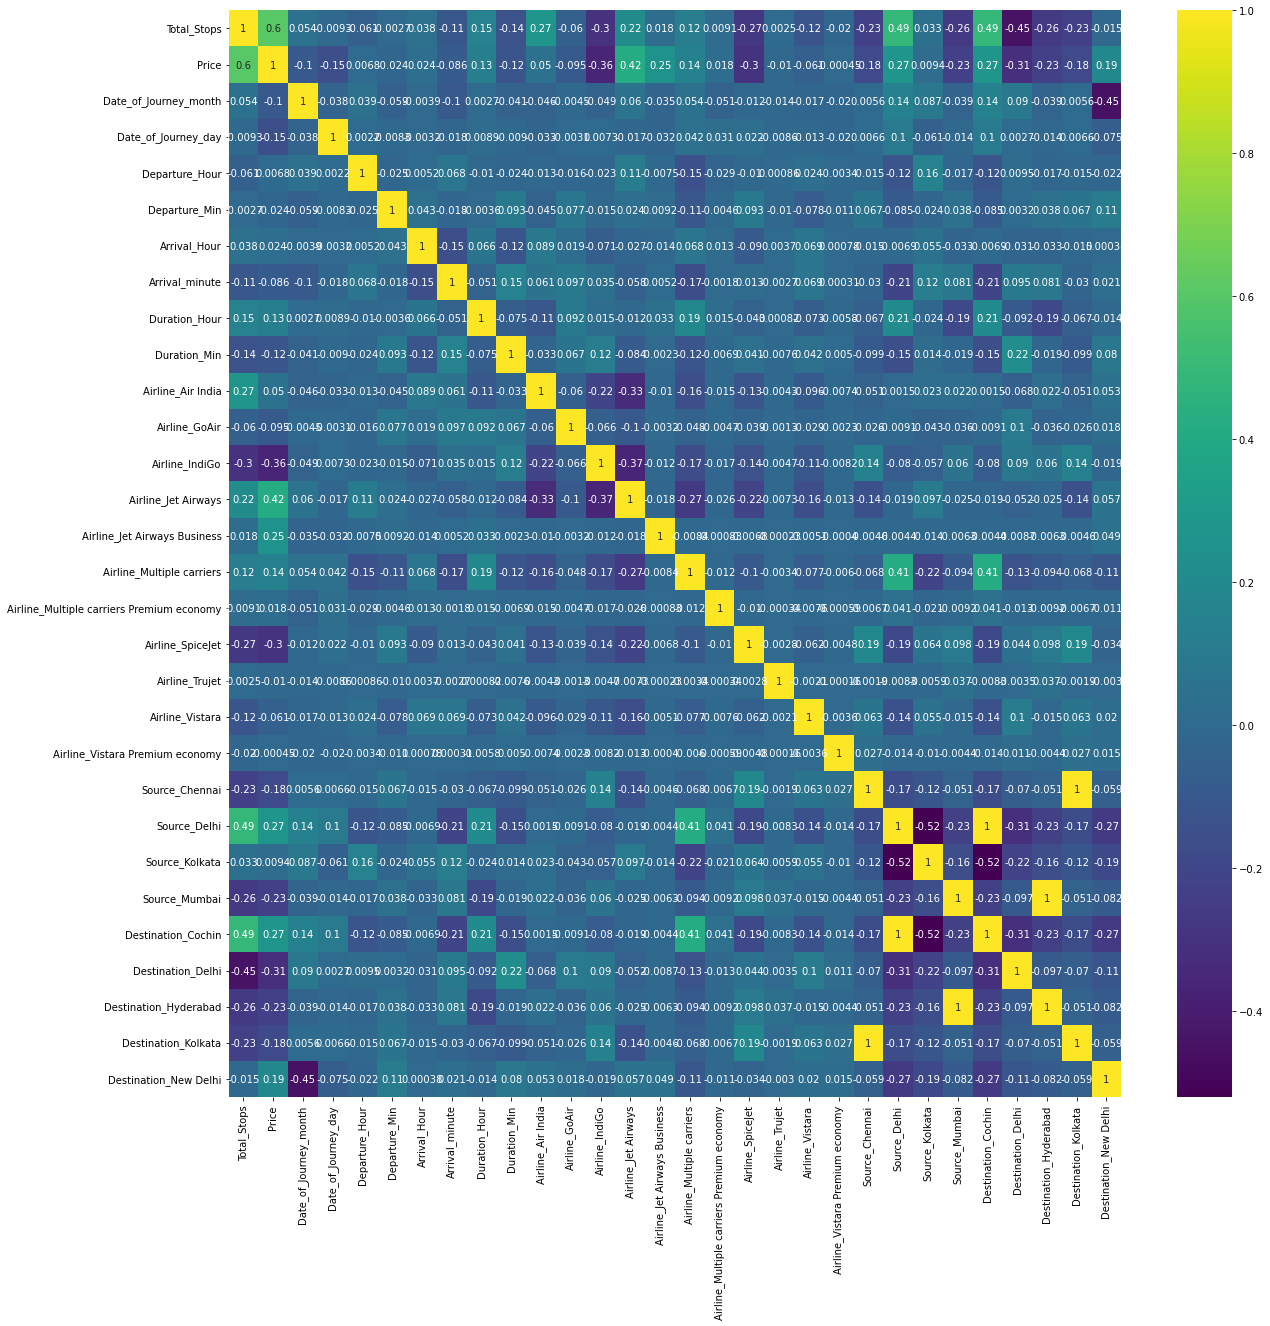

In [68]:
plt.figure(figsize = (20,20))
sns.heatmap(dataset.corr(),annot = True,cmap= "viridis")


# Splitting the data in X and Y for Training

In [69]:
x = dataset.drop(["Price"],axis =1)
y = dataset["Price"]

In [70]:
# Important Feature using ExtrasTreesRegressor

In [71]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)


ExtraTreesRegressor()

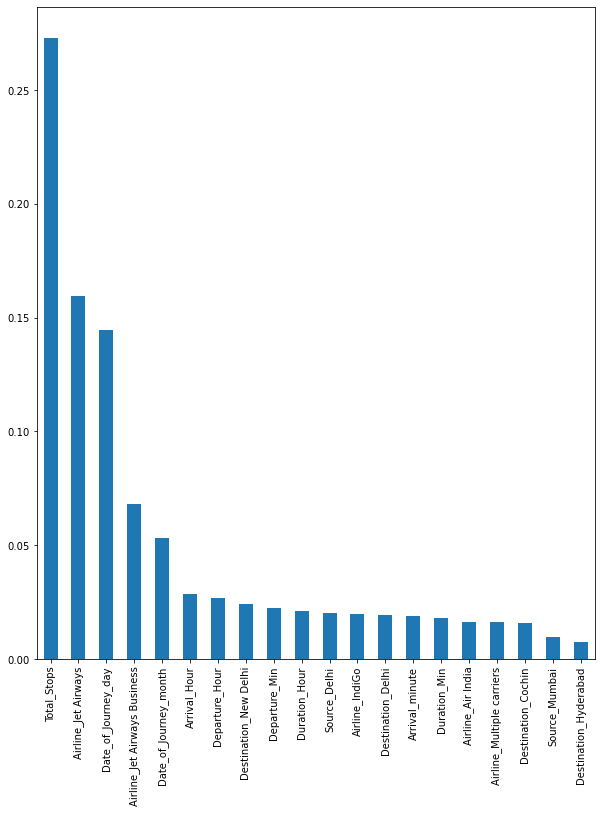

In [72]:
plt.figure(figsize = (10,12))
Imp_feature = pd.Series(selection.feature_importances_, index = x.columns)
Imp_feature.nlargest(20).plot(kind = "bar")
plt.show()

In [73]:
x.columns


Index(['Total_Stops', 'Date_of_Journey_month', 'Date_of_Journey_day',
       'Departure_Hour', 'Departure_Min', 'Arrival_Hour', 'Arrival_minute',
       'Duration_Hour', 'Duration_Min', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [74]:
###Splitting of Variables for Training and validation

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 101)

# Model Testings

# Random Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train,y_train)

RandomForestRegressor()

In [77]:
y_pred = RF.predict(x_test)

In [78]:
y_pred_train = RF.predict(x_train)

In [79]:
from sklearn.metrics import r2_score 

In [80]:
print("Training result: ", r2_score(y_train, y_pred_train))
print("############"*10)

print("Test result: ", r2_score(y_test, y_pred))

Training result:  0.9561145244349651
########################################################################################################################
Test result:  0.8120736910066205


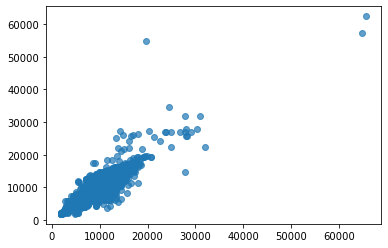

In [81]:
plt.scatter(y_pred,y_test, alpha = 0.7)

In [82]:
from sklearn import metrics

In [83]:
print("MAE", metrics.mean_absolute_error(y_test,y_pred))

MAE 1196.7359155610498


In [84]:
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE 2007.904692069374


In [85]:
print("MSE", metrics.mean_squared_error(y_test,y_pred))

MSE 4031681.252434208


In [86]:
RF.score(x_test, y_test)

0.8120736910066205

<AxesSubplot:xlabel='Price', ylabel='Density'>

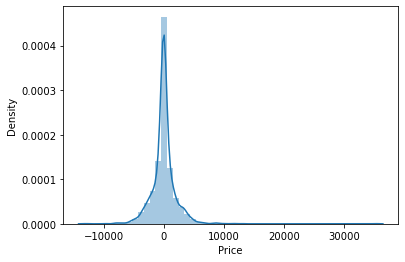

In [87]:
sns.distplot(y_test-y_pred)

In [88]:
###

In [89]:
#Hyperparameter Tuning

In [90]:
from sklearn.model_selection import RandomizedSearchCV

In [91]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [92]:

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [93]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2)

In [94]:

rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   2.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   2.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   2.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   2.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   2.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500; total time=  10.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500; total time=   8.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [95]:

rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [96]:

y_pred_new = rf_random.predict(x_test)

In [97]:
print("Training result: ", r2_score(y_train, y_pred_train))
print("############"*10)

print("Test result: ", r2_score(y_test, y_pred_new))

Training result:  0.9561145244349651
########################################################################################################################
Test result:  0.8138503574492126


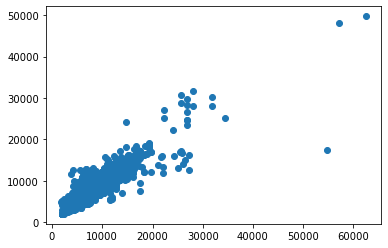

In [98]:
plt.scatter(y_test,y_pred_new)

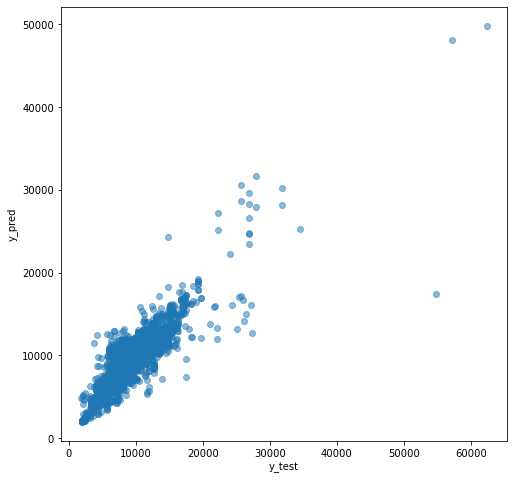

In [99]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred_new, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [100]:
print("MAE", metrics.mean_absolute_error(y_test,y_pred_new))

MAE 1302.8173136632572


In [101]:
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test,y_pred_new)))

RMSE 1998.3907274021708


In [102]:
####

# XGBoost

In [103]:
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [104]:
y_pred_xgb_train = XGB.predict(x_train)
y_pred_xgb_test = XGB.predict(x_test)

In [105]:
print("Training result: ", r2_score(y_train, y_pred_xgb_train))
print("############"*10)

print("Test result: ", r2_score(y_test, y_pred_xgb_test))

Training result:  0.9390417420257484
########################################################################################################################
Test result:  0.8373700458151092


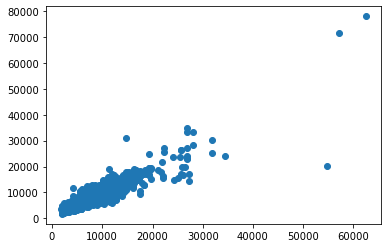

In [106]:
plt.scatter(x = y_test, y = y_pred_xgb_test)

In [107]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_xgb_test))

MAE: 1160.6525167781554


In [108]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb_test)))

RMSE: 1867.8825823804975


<AxesSubplot:ylabel='Density'>

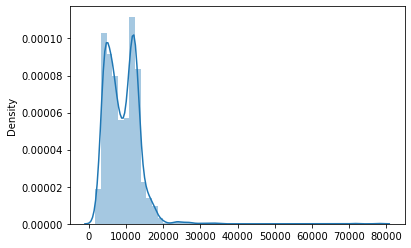

In [109]:

sns.distplot((y_pred_xgb_test))

<AxesSubplot:xlabel='Price', ylabel='Density'>

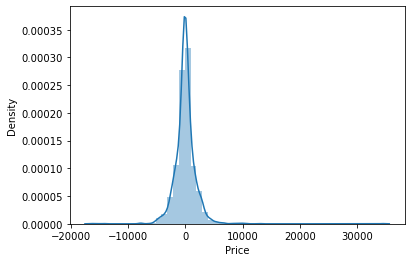

In [110]:

sns.distplot((y_test-y_pred_xgb_test))

In [111]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [112]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [113]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
XGB_random = RandomizedSearchCV(estimator = XGB, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2)

In [114]:
XGB_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[20:37:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   7.5s
[20:37:27] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter a

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   2.2s
[20:38:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=500; total time=  13.1s
[20:38:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being 

[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=  25.6s
[20:42:41] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=  18.6s
[20:43:00] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being m

[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   4.9s
[20:45:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   3.8s
[20:45:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being m

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, m...
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, ...),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [115]:
XGB_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 5}

In [116]:

y_pred_new_xgb = XGB_random.predict(x_test)

In [117]:
print("Training result: ", r2_score(y_train, y_pred_train))
print("############"*10)

print("Test result: ", r2_score(y_test, y_pred_new_xgb))

Training result:  0.9561145244349651
########################################################################################################################
Test result:  0.8138779339831353


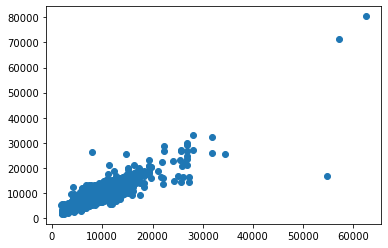

In [118]:
plt.scatter(y_test,y_pred_new_xgb)

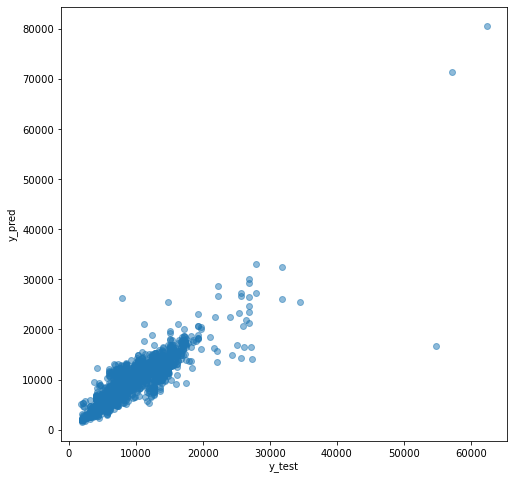

In [119]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred_new_xgb, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [120]:
print("MAE", metrics.mean_absolute_error(y_test,y_pred_new_xgb))

MAE 1202.828445417432


In [121]:
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test,y_pred_new_xgb)))

RMSE 1998.242699369306


In [130]:
x.head()

,Total_Stops,Date_of_Journey_month,Date_of_Journey_day,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_minute,Duration_Hour,Duration_Min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3,24,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,6,9,9,25,4,25,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,5,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# **** Saving the Model

In [133]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(RF, file)


In [144]:
model = open('flight_rf.pkl','rb')
rfg = pickle.load(model)

In [145]:
y_prediction = RF.predict(x_test)

In [146]:
metrics.r2_score(y_test,y_prediction)

0.8120736910066205